# <center>Feature Extraction,Classification and Sentiment Analysis</center>

### 1. Loading Dependencies

In [285]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import requests
from bs4 import BeautifulSoup 
import numpy as np
import pandas as pd
import re
from decimal import Decimal
import csv
import os
import string
#import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette()
%matplotlib inline
from nltk.corpus import stopwords
import string
eng_stopwords = set(stopwords.words("english"))
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt

In [286]:
df = pd.read_csv("/Users/grv/Downloads/sample_for_all.csv")


In [288]:
df.isna().sum()

Reviewer Details         0
 Effectiveness Rating    0
 Ease_of_Use Rating      0
 Satisfaction Rating     0
 Comment                 0
Age                      0
Gender                   0
dtype: int64

In [289]:
df.head()

,Reviewer Details,Effectiveness Rating,Ease_of_Use Rating,Satisfaction Rating,Comment,Age,Gender
0,virleo| 55-64 Female on Treatment for less t...,1,1,1,A few years ago a doctor at an urgent care cli...,55-64,Female
1,Mtdwnurse1| 45-54 Female on Treatment for 6 ...,4,4,4,After my neck fusion to my cervical C5|6|7| bo...,45-54,Female
2,Foots55| 65-74 Female on Treatment for 1 to ...,3,2,2,Its been ok but had others that worked better,65-74,Female
3,GoneRacin24| 65-74 Female on Treatment for 1...,1,5,1,Severe neuropathic pain in left leg into my to...,65-74,Female
4,75 or over Male on Treatment for less than 1...,2,5,1,Pain relief was minimal. I had almost all the ...,75 or over,Male


###### Satisfication Rating distribution based on Age groups
The below graph depicts Satisfaction Rating  distributed over different age intervals and thus we can say Age group 45-54 and 55-64 are highly satisfied with the medicies they are using as compared to other age groups.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


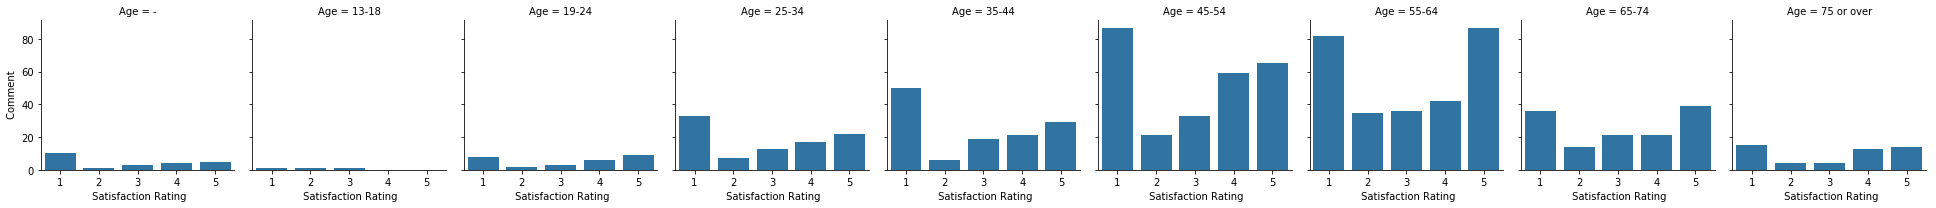

In [290]:
grouped_df = df.groupby(['Age', ' Satisfaction Rating']).count().reset_index()
#print(grouped_df)
plt.figure(figsize=(12,8))
g = sns.FacetGrid(grouped_df, col="Age")
g.map(sns.barplot, " Satisfaction Rating", ' Comment');

###### Comments - Adding number of words, unique words, characters, stopwords, title.

In [239]:

## Number of words in the text ##
df["num_words"] = df[" Comment"].apply(lambda x: len(str(x).split()))


## Number of unique words in the text ##
df["num_unique_words"] = df[" Comment"].apply(lambda x: len(set(str(x).split())))


## Number of characters in the text ##
df["num_chars"] = df[" Comment"].apply(lambda x: len(str(x)))


## Number of stopwords in the text ##
df["num_stopwords"] = df[" Comment"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))


## Number of punctuations in the text ##
df["num_punctuations"] =df[' Comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )


## Number of title case words in the text ##
df["num_words_upper"] = df[" Comment"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))


## Number of title case words in the text ##
df["num_words_title"] = df[" Comment"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))


## Average length of the words in the text ##
df["mean_word_len"] = df[" Comment"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


###### Added Polarity and Subjectivity of comments using Textblob.

This is incorporated to understand positivity or negativity demonstrated from the comments and also how objective/subjective was the comment. 

In [240]:
from textblob import TextBlob
df[['polarity', 'subjectivity']] = df[' Comment'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [241]:
ss=df.info()
print(ss)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
Reviewer Details         999 non-null object
 Effectiveness Rating    999 non-null int64
 Ease_of_Use Rating      999 non-null int64
 Satisfaction Rating     999 non-null int64
 Comment                 999 non-null object
Age                      999 non-null object
Gender                   999 non-null object
num_words                999 non-null int64
num_unique_words         999 non-null int64
num_chars                999 non-null int64
num_stopwords            999 non-null int64
num_punctuations         999 non-null int64
num_words_upper          999 non-null int64
num_words_title          999 non-null int64
mean_word_len            999 non-null float64
polarity                 999 non-null float64
subjectivity             999 non-null float64
dtypes: float64(3), int64(10), object(4)
memory usage: 132.8+ KB
None


In [242]:
df.head()

,Reviewer Details,Effectiveness Rating,Ease_of_Use Rating,Satisfaction Rating,Comment,Age,Gender,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,polarity,subjectivity
0,virleo| 55-64 Female on Treatment for less t...,1,1,1,A few years ago a doctor at an urgent care cli...,55-64,Female,122,94,693,60,14,6,13,4.688525,-0.139583,0.485417
1,Mtdwnurse1| 45-54 Female on Treatment for 6 ...,4,4,4,After my neck fusion to my cervical C5|6|7| bo...,45-54,Female,273,166,1480,128,41,7,21,4.421245,0.096087,0.385435
2,Foots55| 65-74 Female on Treatment for 1 to ...,3,2,2,Its been ok but had others that worked better,65-74,Female,9,9,46,4,0,0,0,4.222222,0.500000,0.500000
3,GoneRacin24| 65-74 Female on Treatment for 1...,1,5,1,Severe neuropathic pain in left leg into my to...,65-74,Female,60,53,297,22,7,2,6,3.950000,-0.500000,0.500000
4,75 or over Male on Treatment for less than 1...,2,5,1,Pain relief was minimal. I had almost all the ...,75 or over,Male,23,23,156,7,10,1,3,5.826087,0.108333,0.500000


###### Correlation plot
Our prediction parameter was Satisfaction Rating , hence from the below correlation plot we can identify Satisfaction Rating and Effectiveness Rating to have high correlation of about 86% .

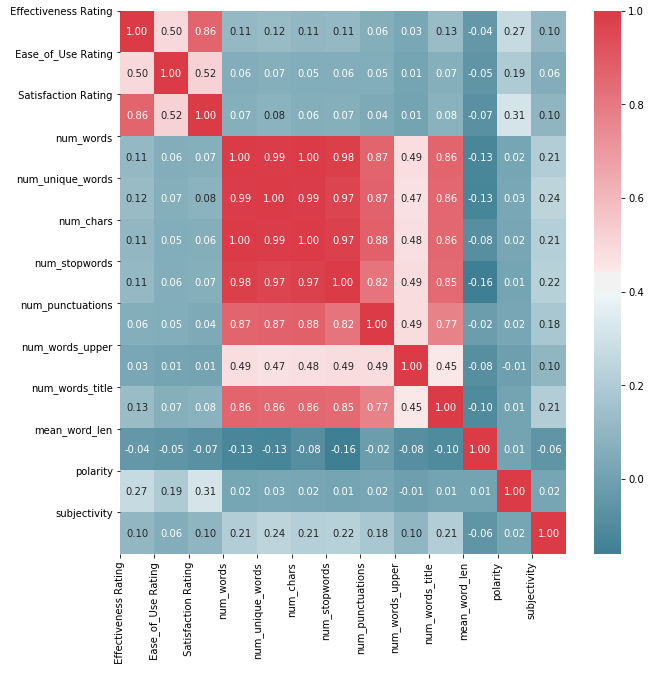

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt
 
def heatMap(df):
    """
    Params: df - DataFrame of our Abalone data
    Return: Generates a heatmap plot
    """#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

heatMap(df)

### Data Pre-processing
Using LabelEncoder we converted the string data into numerical values in order to be able to use for classification in further analysis.

In [244]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Age'] = encoder.fit_transform(df['Age'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [245]:
cols_to_drop = ['Reviewer Details', ' Comment']
df = df.drop(cols_to_drop, axis = 1)
X = df.drop(' Satisfaction Rating', axis = 1)
y = df[' Satisfaction Rating']


### Machine Learning Algorithm

In [246]:
from sklearn import ensemble, metrics, model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#k_fold = KFold(len(X), n_folds=10, shuffle=True, random_state=0)
#print(np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1)))


Train Test Split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

###### Gaussian Naive Bayes Algorithm

Satisfaction rating was predicted with respect to features extracted in the dataset. After fitting the algorithm, we achieved model accuracy of 59%.

In confusion matrix, the diagonal items represent true-positive values whereas everything else either represents true-negative or false-positive values. This corresponds to error of 41%.

In [248]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
nb_score=clf.score(X_test, y_test)
y_pred_clf = clf.predict(X_test)
confusion_matrix(y_test,y_pred_clf)
nb_score

GaussianNB(priors=None)

array([[89,  2,  3,  4,  1],
       [22,  0,  5,  3,  1],
       [13,  2,  4, 11,  8],
       [ 3,  0,  9, 19, 23],
       [ 3,  0,  2,  8, 65]])

0.59

###### Logistic Regression Algorithm

Satisfaction rating was predicted with respect to features extracted in the dataset. After fitting the algorithm, we achieved model accuracy of 60.6%.

In confusion matrix, the diagonal items represent true-positive values whereas everything else either represents true-negative or false-positive values. This corresponds to error of 39.4%.

In [249]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
#y_lr_pred = lr.predict(y_test)
lr_score=lr.score(X_test, y_test)
y_pred_lr = lr.predict(X_test)
confusion_matrix(y_test,y_pred_lr)
lr_score

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([[91,  1,  2,  4,  1],
       [20,  4,  1,  3,  3],
       [16,  0,  3,  5, 14],
       [ 7,  0,  2,  9, 36],
       [ 0,  1,  0,  2, 75]])

0.6066666666666667

###### Support Vector Machine Classifier Algorithm

Satisfaction rating was predicted with respect to features extracted in the dataset. After fitting the algorithm, we achieved model accuracy of 43%.

In confusion matrix, the diagonal items represent true-positive values whereas everything else either represents true-negative or false-positive values. This corresponds to error of 57%.

In [250]:
svm = SVC(gamma=0.001, C=1.0)
svm.fit(X_train,y_train)
svm_score=svm.score(X_test,y_test)
y_pred_svm = svm.predict(X_test)
confusion_matrix(y_test,y_pred_svm)
svm_score

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([[74,  0,  0,  3, 22],
       [20,  0,  2,  1,  8],
       [23,  0,  0,  2, 13],
       [20,  0,  0,  8, 26],
       [23,  0,  0,  8, 47]])

0.43

###### Random Forest Algorithm

Satisfaction rating was predicted with respect to features extracted in the dataset. After fitting the algorithm, we achieved model accuracy of 61.6%.

In confusion matrix, the diagonal items represent true-positive values whereas everything else either represents true-negative or false-positive values. This corresponds to error of 38.4%.

In [262]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_pred_rf = rf.predict(X_test)
confusion_matrix(y_test,y_pred_rf)
rf_score

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

array([[86,  1,  7,  5,  0],
       [18,  2,  8,  2,  1],
       [10,  5, 13,  8,  2],
       [ 1,  0, 12, 28, 13],
       [ 1,  0,  2, 19, 56]])

0.6166666666666667

###### Neural Network Algorithm

Satisfaction rating was predicted with respect to features extracted in the dataset. After fitting the algorithm, we achieved model accuracy of 59.3%.

In confusion matrix, the diagonal items represent true-positive values whereas everything else either represents true-negative or false-positive values. This corresponds to error of 40.7%.

In [252]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,40,50), random_state=1)
nn.fit(X_train,y_train)
nn_score=nn.score(X_test,y_test)
y_pred_nn = nn.predict(X_test)
confusion_matrix(y_test,y_pred_nn)
nn_score

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 40, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

array([[89,  0,  2,  4,  4],
       [21,  1,  1,  4,  4],
       [13,  0,  2,  9, 14],
       [ 4,  2,  5, 13, 30],
       [ 1,  0,  0,  4, 73]])

0.5933333333333334

###### Parameter Tuning using GridSearch
We used GridSearch on Neural Network algorithm to get best parameters with 2 fold cross validation. It yielded us a average precision of 50% , although no significant performance improvement was observed.

In [253]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [254]:
from sklearn.model_selection import GridSearchCV


In [255]:
clf2 = GridSearchCV(nn, parameter_space, n_jobs=-1, cv=2)
clf2.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

GridSearchCV(cv=2, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 40, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [256]:
print('Best parameters found:\n', clf2.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [257]:
means = clf2.cv_results_['mean_test_score']
stds = clf2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.332 (+/-0.045) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.532 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.332 (+/-0.051) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.532 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.365 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.551 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.383 (+/-0.017) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 

In [258]:
y_true, y_pred = y_test , clf.predict(X_test)


In [259]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
             precision    recall  f1-score   support

          1       0.68      0.90      0.78        99
          2       0.00      0.00      0.00        31
          3       0.17      0.11      0.13        38
          4       0.42      0.35      0.38        54
          5       0.66      0.83      0.74        78

avg / total       0.50      0.59      0.53       300



###### K-Nearest Neighbors Algorithm

Satisfaction rating was predicted with respect to features extracted in the dataset. After fitting the algorithm, we achieved model accuracy of 40%.

In confusion matrix, the diagonal items represent true-positive values whereas everything else either represents true-negative or false-positive values. This corresponds to error of 60%.

In [260]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn_score=knn.score(X_test,y_test)
y_pred_knn = knn.predict(X_test)
confusion_matrix(y_test,y_pred_knn)
knn_score

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

array([[69,  4,  3,  6, 17],
       [11,  1,  3,  5, 11],
       [17,  3,  2,  6, 10],
       [18,  3,  4, 16, 13],
       [18,  5,  3, 20, 32]])

0.4

###### Conclusion
Random Forest algorithm aligns with the data and proved to be a better classifier. We used Satisfaction rating as our decision variable and other columns as independent variables which were used to predict the decision variable.



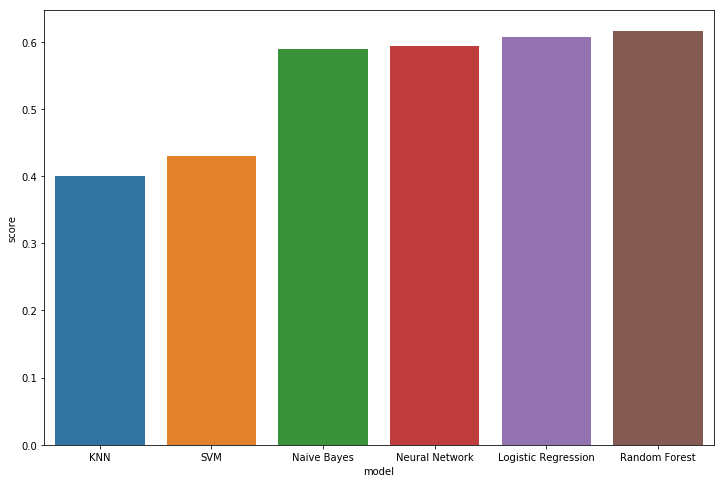

In [263]:
y = (knn_score, nn_score, nb_score, svm_score, rf_score, lr_score)
x = ('KNN', 'Neural Network', 'Naive Bayes', 'SVM', 'Random Forest', 'Logistic Regression')
data = pd.DataFrame({'model':x,'score':y})
sorted_d=data.sort_values(by=['score'])

plt.figure(figsize=(12,8))
sns.barplot(x=sorted_d.model, y=sorted_d.score)

### Sentiment Analysis
Using the textblob library to calculate the polarity and sentiment of the reviews from the sample. Here we just combine the results to get some metrics which help us determine the conclusion.

In [264]:
df2= pd.read_csv("/Users/grv/Downloads/sample_for_all.csv")

In [265]:
kk = df2[' Comment']
kk = kk.tolist()
type(kk)

list

In [266]:
bloblist = []
for row in kk:
    blob = TextBlob(row)
    bloblist.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))

In [267]:
df3 = pd.DataFrame(bloblist, columns = ['review','sentiment','polarity'])
df3.head()

,review,sentiment,polarity
0,A few years ago a doctor at an urgent care cli...,-0.139583,0.485417
1,After my neck fusion to my cervical C5|6|7| bo...,0.096087,0.385435
2,Its been ok but had others that worked better,0.500000,0.500000
3,Severe neuropathic pain in left leg into my to...,-0.500000,0.500000
4,Pain relief was minimal. I had almost all the ...,0.108333,0.500000


#### Assinging values to positive and negative comments or subjective and objective comments

In [277]:
df3['positive'] = np.where(df3.sentiment > .2,1,0)

In [279]:
df3['Subjective'] = np.where(df3.polarity < .49,1,0)

In [280]:
pos_count = len(df3[(df3['positive'] == 1)])
neg_count = len(df3[(df3['positive'] == 0)])
print("\nPostive Comments : ",pos_count)
print("\nNegative Comments : ",neg_count)


Postive Comments :  200

Negative Comments :  799


#### It is observed that from the sample of 1000 reviews 799 turned out to be negative comments. Whereas only 200 were positive. This shows that overall people are not very satistfied with this particular product

In [281]:
df3.head()

,review,sentiment,polarity,positive,Negative,Subjective
0,A few years ago a doctor at an urgent care cli...,-0.139583,0.485417,0,1,1
1,After my neck fusion to my cervical C5|6|7| bo...,0.096087,0.385435,0,1,1
2,Its been ok but had others that worked better,0.500000,0.500000,1,0,0
3,Severe neuropathic pain in left leg into my to...,-0.500000,0.500000,0,1,0
4,Pain relief was minimal. I had almost all the ...,0.108333,0.500000,0,1,0


#### Also, It is observed that we have more than half of the reviews which were classified as subjective.

In [282]:
sub_count = len(df3[(df3['Subjective'] == 1)])
obj_count = len(df3[(df3['Subjective'] == 0)])
print("\nSubjective Comments : ",sub_count)
print("\nObjective Comments : ",obj_count)


Subjective Comments :  565

Objective Comments :  434


### Conclusion:
1. It leaves us to a conclusion that the reviews we scrapped and analysed are __heavily biased__ and hence __can not be recommended__ to use for strategic market analysis.<break>
    
2. People are __extremely polarised__ while reviewing the products on WebMD website. This make it less usefull for studying it for commercial purposes.<break>

3. However, We spotted some useful information regarding the __side-effects__ that people were suffering from. The analysis also revealed the __competitors drugs__ which people were referring to as an alternative.

4. We also get some knowledge about the __satisfaction__ of the drug in different __age and gender categories__.